In [173]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [174]:
#import initial data
data = pd.read_csv ("C:/Users/blien/Documents/WGU/D209/Task1/3kfid8emf9rkc9ek30sf/medical_clean.csv",dtype={'locationid':np.int64}) 
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [175]:
type(data)

pandas.core.frame.DataFrame

In [176]:
print(data.keys())

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [177]:
data_nulls = data.isnull().sum()
print(data_nulls)

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [178]:
data.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

In [179]:
# variable for numeric data
num_cols = data.select_dtypes(include="number").columns
print(num_cols)

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [180]:
# variable for categorical data
cat_cols = data.select_dtypes(include="object").columns
print(cat_cols)

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services'],
      dtype='object')


<Figure size 720x1440 with 0 Axes>

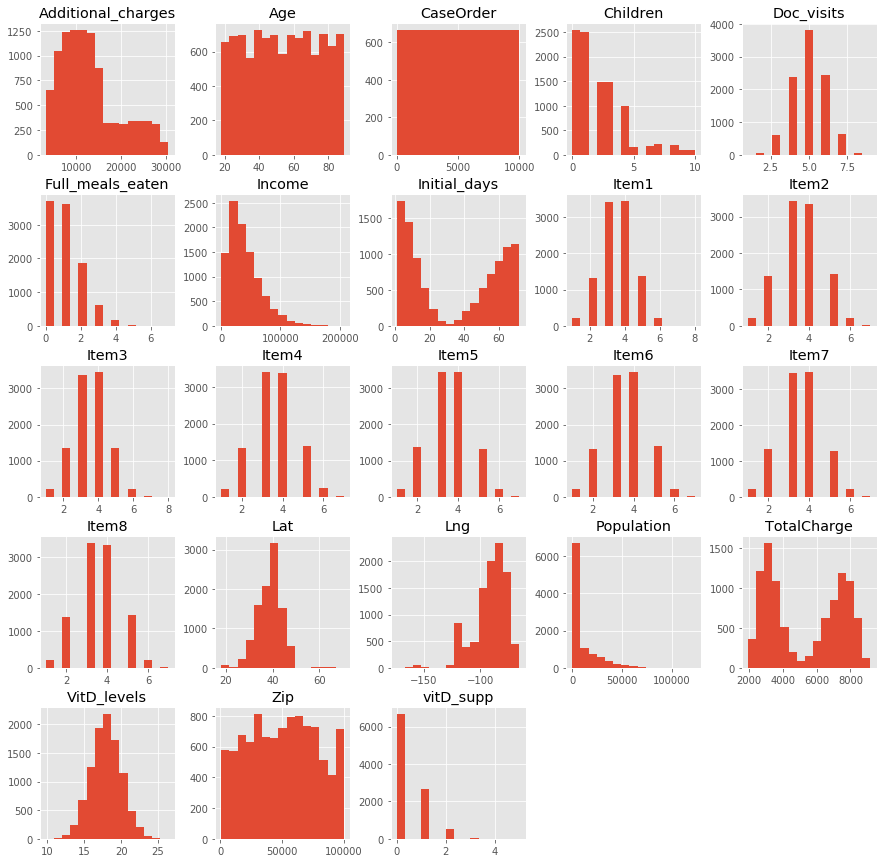

In [181]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = data[num_cols].hist(bins = 15, figsize=(15,15))
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

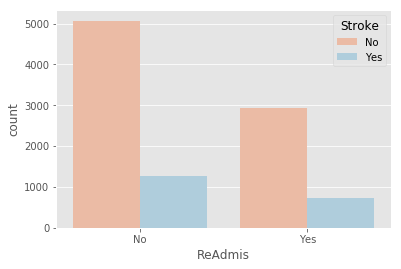

In [182]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x= data['ReAdmis'], hue= data['Stroke'], data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

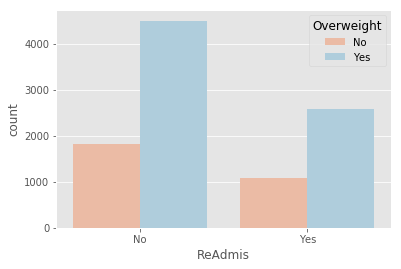

In [183]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x= data['ReAdmis'], hue= data['Overweight'], data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

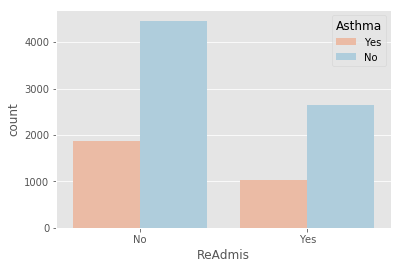

In [184]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x= data['ReAdmis'], hue= data['Asthma'], data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [185]:
# Remove less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis
df = data.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital', 'Gender','Soft_drink',
       'Initial_admin', 'Complication_risk',
       'Services','CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
df.head()

,ReAdmis,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge
0,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.585770,3726.702860
1,No,Yes,No,Yes,No,No,No,No,No,No,Yes,No,15.129562,4193.190458
2,No,Yes,No,Yes,No,Yes,No,No,No,No,No,No,4.772177,2434.234222
3,No,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,1.714879,2127.830423
4,No,No,No,No,No,No,Yes,No,No,Yes,No,No,1.254807,2113.073274


In [186]:
# variable for categorical data
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma'],
      dtype='object')


In [187]:
df.dtypes

ReAdmis                object
HighBlood              object
Stroke                 object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Initial_days          float64
TotalCharge           float64
dtype: object

In [188]:
# convert categorical data into dummy variables 
for c in cat_cols:
    if c in df.columns:
        df = pd.get_dummies(df, columns=[c], drop_first=True)
pred_vars = df.select_dtypes(include="uint8").columns.tolist()
print(pred_vars)

['ReAdmis_Yes', 'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes']


In [189]:
# Provide copy of the prepared data set.
final_data = 'd209_task1_final_data.csv'
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))

File saved to: d209_task1_final_data.csv


In [190]:
df.describe()

,Initial_days,TotalCharge,ReAdmis_Yes,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,34.455299,5312.172769,0.366900,0.409000,0.199300,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930
std,26.309341,2180.393838,0.481983,0.491674,0.399494,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346
min,1.001981,1938.312067,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7.896215,3179.374015,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,35.836244,5213.952000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,61.161020,7459.699750,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,71.981490,9180.728000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [191]:
# Re-read fully numerical dataset
df = pd.read_csv('d209_task1_final_data.csv')

y = df['ReAdmis_Yes'].values 
X = df.drop('ReAdmis_Yes', axis=1).values 

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

In [192]:
#train data 
trainData = np.column_stack([X_train, y_train]).tolist()
np.savetxt("traindata.csv", trainData, delimiter=",", fmt="%.2f",
           header="Initial days, Total Charge, ReAdmis, HighBlood, Stroke, Overweight, Arthritis, Diabetes,Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis,Reflux_esophagitis, Asthma", comments="")

In [193]:
#test data
testData =np.column_stack([X_test, y_test]).tolist()
np.savetxt("testdata.csv", testData, delimiter=",", fmt="%.2f",
           header="Initial days, Total Charge, ReAdmis, HighBlood, Stroke, Overweight, Arthritis, Diabetes,Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis,Reflux_esophagitis, Asthma", comments="")

In [194]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.93


In [195]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Instantiate KNN model
knn = KNeighborsClassifier()
# Fit data to KNN model
knn.fit(X_train, y_train)
# Predict outcomes from test set
y_pred = knn.predict(X_test)

In [196]:
# Print initial accuracy score of KNN model
print('Initial accuracy score KNN model: ', accuracy_score(y_test, y_pred))

Initial accuracy score KNN model:  0.974


In [197]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1233   33]
 [  19  715]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1266
           1       0.96      0.97      0.96       734

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



([<matplotlib.axis.XTick at 0x1925fdd0>,
 <a list of 5 Text xticklabel objects>)

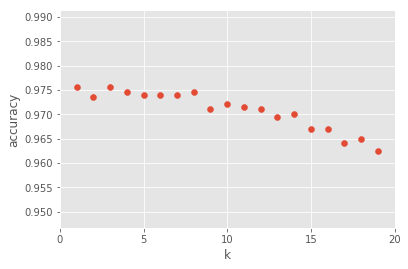

In [198]:
#classification before scaling
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [199]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.97


In [200]:
# Set steps for pipeline object
steps = [('scaler', StandardScaler()),
 ('knn', KNeighborsClassifier())]

# Instantiate pipeline
pipeline = Pipeline(steps)

# Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

# Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

In [201]:
# Print new accuracy score of scaled KNN model
print('New accuracy score of scaled KNN model: {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

New accuracy score of scaled KNN model: 0.919


In [202]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 5 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_scaled)

# Print the accuracy
print('Accuracy of K-NN classifier on scaled training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train_scaled)))
print('Accuracy of K-NN classifier on scaled test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_pred_scaled)))

Accuracy of K-NN classifier on scaled training set: 0.98
Accuracy of K-NN classifier on scaled test set: 0.93


In [203]:
# Compute classification metrics after scaling
print(classification_report(y_test_scaled, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1261
           1       0.85      0.96      0.90       739

    accuracy                           0.92      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [204]:
 # Import sklearn confusion_matrix & generate results
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_scaled, y_pred_scaled)
print(cf_matrix)

[[1132  129]
 [  32  707]]


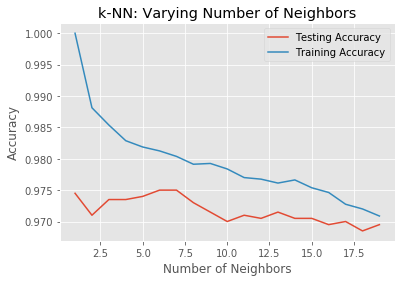

In [205]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train_scaled)
    
    #Compute accuracy on the training set scaled
    train_accuracy[i] = knn.score(X_train_scaled, y_train_scaled)

    #Compute accuracy on the testing set scaled
    test_accuracy[i] = knn.score(X_test_scaled, y_test_scaled)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [206]:
 # Import GridSearchCV for cross validation of model
from sklearn.model_selection import GridSearchCV
# Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 50)}
# Re-intantiate KNN for cross validation
knn = KNeighborsClassifier()
# Instantiate GridSearch cross validation
knn_cv = GridSearchCV(knn , param_grid, cv=5)
# Fit model to
knn_cv.fit(X_train_scaled, y_train_scaled)
# Print best parameters
print('Best parameters for this KNN model: {}'.format(knn_cv.best_params_))

Best parameters for this KNN model: {'n_neighbors': 7}


In [207]:
# Generate model best score
print('Best score for this KNN model: {:.3f}'.format(knn_cv.best_score_))

Best score for this KNN model: 0.973


In [208]:
 # Import ROC AUC metrics for explaining the area under the curve
from sklearn.metrics import roc_auc_score
# Fit it to the data
knn_cv.fit(X_train_scaled, y_train_scaled)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test_scaled)[::,1]
# Compute and print AUC score
print("The Area under curve (AUC) on validation dataset is: {:.4f}".format(roc_auc_score(y_test_scaled, y_pred_prob)))

The Area under curve (AUC) on validation dataset is: 0.9945


In [209]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X_train_scaled, y_train_scaled, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print("The mean of the AUC scores computed using 5-fold cross-validation: {}".format(cv_auc.mean()))

AUC scores computed using 5-fold cross-validation: [0.98874461 0.98769025 0.98362347 0.99345511 0.98863606]
The mean of the AUC scores computed using 5-fold cross-validation: 0.9884298994957961
